In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=7eb018860261a84838434577b01d9debd164d0d3007d001cd6e77589ffa8f281
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
!pip install pandas.plotting

ERROR: Could not find a version that satisfies the requirement pandas.plotting (from versions: none)
ERROR: No matching distribution found for pandas.plotting


In [ ]:
from pyspark.ml import Pipeline
from pyspark.sql.functions import col, when


In [ ]:
import pyspark
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession, SQLContext
spark = SparkSession.Builder().appName("Project_DDAM_parquet").getOrCreate()

In [ ]:
sqlCtx= SQLContext(spark)

/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:113: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=spark.read.format("parquet").option("header", True).option("inferSchema", True).load('/content/drive/MyDrive/Colab Notebooks/Combined_Flights_2018.parquet')

In [ ]:
df.select(df.columns[:5]).show()

+-------------------+-----------------+------+----+---------+
|         FlightDate|          Airline|Origin|Dest|Cancelled|
+-------------------+-----------------+------+----+---------+
|2018-01-23 00:00:00|Endeavor Air Inc.|   ABY| ATL|    false|
|2018-01-24 00:00:00|Endeavor Air Inc.|   ABY| ATL|    false|
|2018-01-25 00:00:00|Endeavor Air Inc.|   ABY| ATL|    false|
|2018-01-26 00:00:00|Endeavor Air Inc.|   ABY| ATL|    false|
|2018-01-27 00:00:00|Endeavor Air Inc.|   ABY| ATL|    false|
|2018-01-28 00:00:00|Endeavor Air Inc.|   ABY| ATL|    false|
|2018-01-29 00:00:00|Endeavor Air Inc.|   ABY| ATL|    false|
|2018-01-30 00:00:00|Endeavor Air Inc.|   ABY| ATL|    false|
|2018-01-31 00:00:00|Endeavor Air Inc.|   ABY| ATL|    false|
|2018-01-03 00:00:00|Endeavor Air Inc.|   ATL| ABY|    false|
|2018-01-04 00:00:00|Endeavor Air Inc.|   ATL| ABY|    false|
|2018-01-05 00:00:00|Endeavor Air Inc.|   ATL| ABY|    false|
|2018-01-06 00:00:00|Endeavor Air Inc.|   ATL| ABY|    false|
|2018-01

In [ ]:
df.count()

5689512

In [ ]:
# Count the number of True and False values in the column
count_true = df.filter(col("Cancelled") == True).count()
count_false = df.filter(col("Cancelled") == False).count()

# Print the results
print("Count of True values:", count_true)
print("Count of False values:", count_false)

Count of True values: 88373
Count of False values: 5601139


In [ ]:
# Count the number of True and False values in the column
count_true = df.filter(col("Diverted") == True).count()
count_false = df.filter(col("Diverted") == False).count()

# Print the results
print("Count of True values:", count_true)
print("Count of False values:", count_false)

Count of True values: 13955
Count of False values: 5675557


# since DepDelay and DepDelay minutes are quite the same, we decide to drop DepDelayMinutes. DepDelayMinutes show 0 if there is a Difference in minutes between scheduled and actual departure time  but the outcome will be 0. Instead, DepDelay shows a negative number in case of the aircraft departs before the scheduling time.

 - IATA_Code_Marketing_Airline will be dropped since we can't be sure that this id is unique in time.
 - Flight_Number_Marketing_Airline WE DON'T DROP it since the id of flight seems to be the same over the same (not unique code over different flight)
 - we noticed the presence of a pattern like a columns starting with the string "IATA". "IATA" is a code of identification given by a proper institution in America. Since we read that the id might not be unique, we decide to drop every "IATA" COLUMNS
 - The three columns "Originally_schedule_code_share_airline" appears to be composed of error. We delete it.
 - for the operating airline id, we follow the same strategy of Marketing airline id;
 - AirportID is unique in a specific time, AirportSeqID may changes over time so we decide to drop this latter;
 - we drop originWac,OriginState, OriginStateFips identify the same thing, a state, so we decided to drop it and maintain OriginCirynAME, originStateName
 - we follow the same strategy for the destination as above
 - **DepTimeBlk** seems redundant, this attributes is not relevant for the analysis that we want to do since also we have the departure time. We maintain it for an explorative analysis, but we believe that we will drop it
 - **TaxiOut**, explorative task, droppable
 - [**WheelOn** and **Wheeloff** have to be analyzed better, interesting.]
 - We don't know the meaning, we have dropped it
 - **ArrTimeBlk** seems redundant, this attributes is not relevant for the analysis that we want to do since also we have the departure time. We maintain it for an explorative analysis, but we believe that we will drop it

___________________________________________


- A **NETWORK** seems to be a group, a cluster of operating airlines. Since this, we decide to maintain both for further analysis
- **TAIL NUMBER** stand for the code afferent to a specific plane. We maintain it in order to be able to understand if a specific plane are much late ort not
- we drop originWac,OriginState, OriginStateFips identify the same thing, a state, so we decided to drop it and maintain OriginCirynAME, originStateName
- We maintain CRSDepTime and DepTime in order to make an explorative task before the dropping. We believe that it might be useful in order to understant if there is same operating airline which leave in delay or in advance
- **DepDe115**
- **Diverted**
- **CRSElapsedTime** and **ActualElapsedTime** are maintained for explorative analysis
- **DivAirportLandings** contiene "None" value. Capire che vuol dire

____________________

 **PROBLEM**

- Flights
- CarrierDelay
- WeatherDelay
- NASDelay
- SecurityDelay
- LateAircraftDelay
- FirstDepTime
- LongestAddGTime
- DivReachedDest
- DivActualElapsedTime
- DivArrDelay
- DivDistance
- Div1Airport
- Div1AirportID
- Div1AirportSeqID
- Div1WheelsOn
- Div1TailNum
- Div2Airport
- Div2AirportID
- Div2AirportSeqID
- Div2WheelsOn
- Div2TotalGTime
- Div2LongestGTime
- Div2LongestGTime
- Div2WheelsOff

In [ ]:
df=df.drop( "Quarter", "DepDelayMinutes", "Year","DOT_ID_Marketing_Airline", "IATA_Code_Marketing_Airline")

In [ ]:
df=df.drop("Originally_Scheduled_Code_Share_Airline", "DOT_ID_Originally_Scheduled_Code_Share_Airline","IATA_Code_Originally_Scheduled_Code_Share_Airline", "Flight_Num_Originally_Scheduled_Code_Share_Airline", "DOT_ID_Operating_Airline" )

In [ ]:
df=df.drop("OriginAirportSeqID","OriginWac","OriginState","OriginStateFips", "DestAirportSeqID","OriginCityMarketID","DestCityMarketID" )

In [ ]:
df=df.drop("DestWac", "DestStateFips","DestState", "TaxiOut", "TaxiIn","ArrDelayMinutes", "Div2WheelsOff")

In [ ]:
from pyspark.sql.functions import col
pattern_regex = "^IATA"

# Seleziona le colonne che corrispondono al pattern
colonne_iata = [col(colonna) for colonna in df.columns if colonna.startswith("IATA")]

# Crea un nuovo DataFrame con le colonne selezionate
df_iata = df.select(*colonne_iata)

# Stampa il nuovo DataFrame
print("Contenuto del DataFrame con colonne 'IATA':")
df_iata.show()

df = df.drop(*colonne_iata)
df.show()

Contenuto del DataFrame con colonne 'IATA':
+---------------------------+
|IATA_Code_Operating_Airline|
+---------------------------+
|                         9E|
|                         9E|
|                         9E|
|                         9E|
|                         9E|
|                         9E|
|                         9E|
|                         9E|
|                         9E|
|                         9E|
|                         9E|
|                         9E|
|                         9E|
|                         9E|
|                         9E|
|                         9E|
|                         9E|
|                         9E|
|                         9E|
|                         9E|
+---------------------------+
only showing top 20 rows

+-------------------+-----------------+------+----+---------+--------+----------+-------+--------+-------+-------+--------------+-----------------+--------+-----+----------+---------+-------------------------+-

## categorical and numeric columns

Colonne Categoriche

In [ ]:
non_num_cols = [item[0] for item in df.dtypes if item[1] == 'string']
print('Le colonne non numeriche sono')
print(non_num_cols)

Le colonne non numeriche sono
['Airline', 'Origin', 'Dest', 'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners', 'Operating_Airline', 'Tail_Number', 'OriginCityName', 'OriginStateName', 'DestCityName', 'DestStateName', 'DepTimeBlk', 'ArrTimeBlk']


Colonne numeriche

In [ ]:
num_cols = [item[0] for item in df.dtypes if item[1] != 'string']
print('Le colonne numeriche sono')
print(num_cols)

Le colonne numeriche sono
['FlightDate', 'Cancelled', 'Diverted', 'CRSDepTime', 'DepTime', 'DepDelay', 'ArrTime', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime', 'Distance', 'Month', 'DayofMonth', 'DayOfWeek', 'Flight_Number_Marketing_Airline', 'Flight_Number_Operating_Airline', 'OriginAirportID', 'DestAirportID', 'DepDel15', 'DepartureDelayGroups', 'WheelsOff', 'WheelsOn', 'CRSArrTime', 'ArrDelay', 'ArrDel15', 'ArrivalDelayGroups', 'DistanceGroup', 'DivAirportLandings', '__index_level_0__']


# Distinct Values

In [ ]:
for c in non_num_cols:
    print(f'column {c} contains {len(df.select(c).distinct().collect())} distinct values')

column Airline contains 28 distinct values
column Origin contains 370 distinct values
column Dest contains 370 distinct values
column Marketing_Airline_Network contains 11 distinct values
column Operated_or_Branded_Code_Share_Partners contains 16 distinct values
column Operating_Airline contains 28 distinct values
column Tail_Number contains 6094 distinct values
column OriginCityName contains 364 distinct values
column OriginStateName contains 52 distinct values
column DestCityName contains 364 distinct values
column DestStateName contains 52 distinct values
column DepTimeBlk contains 19 distinct values
column ArrTimeBlk contains 19 distinct values


In [ ]:
type(df)

pyspark.sql.dataframe.DataFrame

# Missing Value

In [ ]:
from pyspark.sql.functions import isnan, when, count, col, isnull

#for i in range(0,len(non_num_cols),5):
missing_counts = df.select([count(when(isnull(c), c)).alias(c) for c in df.columns])
missing_columns=[column for column in missing_counts.columns if missing_counts.select(column).collect()[0][column]>0]
for column in missing_columns:
    print(f"Colonna: {column}, missing value {missing_counts.collect()[0][column]}")

Colonna: DepTime, missing value 85380
Colonna: DepDelay, missing value 86575
Colonna: ArrTime, missing value 90615
Colonna: AirTime, missing value 109271
Colonna: CRSElapsedTime, missing value 6
Colonna: ActualElapsedTime, missing value 102347
Colonna: Tail_Number, missing value 20548
Colonna: DepDel15, missing value 86575
Colonna: DepartureDelayGroups, missing value 86575
Colonna: WheelsOff, missing value 94684
Colonna: WheelsOn, missing value 97549
Colonna: ArrDelay, missing value 102893
Colonna: ArrDel15, missing value 102893
Colonna: ArrivalDelayGroups, missing value 102893
Colonna: DivAirportLandings, missing value 1


## DROPPING COLUMNS WITH MISSING VALUES

In [ ]:
# Drop columns with at least one missing value
df_cleaned = df.drop(*[col(c) for c in df.columns if df.where(col(c).isNull()).count() > 0])


ERROR:root:KeyboardInterrupt while sending command.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/usr/local/lib/python3.10/dist-packages/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "/usr/lib/python3.10/socket.py", line 705, in readinto
    return self._sock.recv_into(b)
KeyboardInterrupt


KeyboardInterrupt: ignored

In [ ]:
df.printSchema()

In [ ]:
cleaned_df.printSchema()

## Visual Analysis of Dataframe without missing values

In [ ]:
num_cols_cleaned = [item[0] for item in cleaned_df.dtypes if item[1] != 'string']
print('Le colonne numeriche sono')
print(num_cols_cleaned)

Le colonne numeriche sono
['FlightDate', 'Cancelled', 'Diverted', 'CRSDepTime', 'Distance', 'Month', 'DayofMonth', 'DayOfWeek', 'Flight_Number_Marketing_Airline', 'Flight_Number_Operating_Airline', 'OriginAirportID', 'DestAirportID', 'CRSArrTime', 'DistanceGroup', '__index_level_0__']


In [ ]:
%matplotlib inline

cleaned_df.createOrReplaceTempView("flight")
query = sqlCtx.sql("Select Airtime from flight")

xy_columns = cleaned_df.columns
for col in xy_columns:

    print(f">>> plotting distribution for {col}")

    query = sqlCtx.sql(f'Select Airtime, {col} from flight')

    h = query.select(col).rdd.flatMap(lambda x: x).histogram(50)

    # Loading the Computed Histogram into a Pandas Dataframe for plotting
    dfh = pd.DataFrame(
        list(zip(*h)),
        columns=['bin', 'frequency']
    )

    bins = dfh['bin']
    counts = dfh['frequency']

    plt.hist(bins, len(bins), weights=counts)

    plt.xlabel(f'{col}', size=10)
    plt.ylabel("Frequency", size=10)
#     plt.title("Number of songs per mode", size=10)
    plt.show()

In [ ]:
from pyspark.sql import functions as F

def convert_to_minutes_after_midnight(df):
    # Colonnes da convertire
    time_columns = ["CRSDepTime", "CRSArrTime"]

    for column in time_columns:
        # Creazione di una nuova colonna con i valori convertiti in minuti dopo la mezzanotte
        df = df.withColumn(column + "_InMinutes",
                           F.when(F.col(column).isNotNull(),
                                  (F.col(column) % 100) + (F.floor(F.col(column) / 100)) * 60))

    # Rimozione delle colonne originali
    df = df.drop(*time_columns)
    df=df.drop("__index_level_0__")

    return df

# Applica la funzione al tuo DataFrame
cleaned_df = convert_to_minutes_after_midnight(cleaned_df)
cleaned_df=cleaned_df.drop("__index_level_0__")

In [ ]:
cleaned_df.show(20)

+-------------------+-----------------+------+----+---------+--------+--------+-------+--------------+-----------------+--------+-----+----------+---------+-------------------------+---------------------------------------+-------------------------------+-----------------+-----------+-------------------------------+---------------+--------------+---------------+-------------+------------+-------------+--------+--------------------+----------+--------+--------+------------------+----------+-------------+------------------+--------------------+-----------------+-----------------+-------------------+------------------+--------------------+
|         FlightDate|          Airline|Origin|Dest|Cancelled|Diverted|DepDelay|AirTime|CRSElapsedTime|ActualElapsedTime|Distance|Month|DayofMonth|DayOfWeek|Marketing_Airline_Network|Operated_or_Branded_Code_Share_Partners|Flight_Number_Marketing_Airline|Operating_Airline|Tail_Number|Flight_Number_Operating_Airline|OriginAirportID|OriginCityName|OriginSta

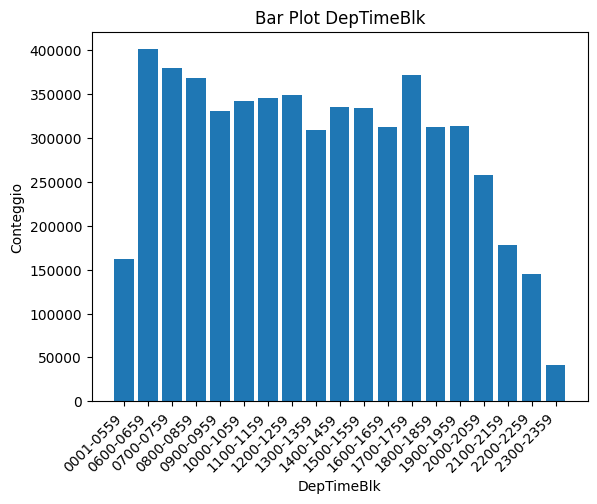

In [ ]:
conteggio_per_categoria = cleaned_df.groupBy("DepTimeBlk").count().toPandas()
conteggio_per_categoria = conteggio_per_categoria.sort_values(by='DepTimeBlk')

# Crea il bar plot utilizzando Matplotlib
plt.bar(conteggio_per_categoria['DepTimeBlk'], conteggio_per_categoria['count'])
plt.xlabel('DepTimeBlk')
plt.ylabel('Conteggio')
plt.title('Bar Plot DepTimeBlk')
plt.xticks(rotation=45, ha="right")
plt.show()

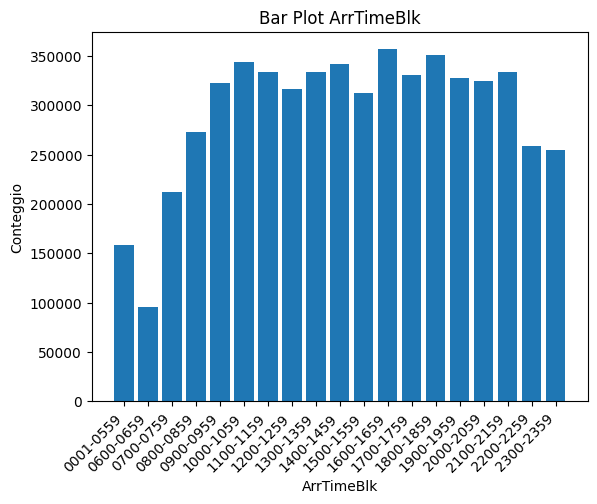

In [ ]:
conteggio_per_categoria = cleaned_df.groupBy("ArrTimeBlk").count().toPandas()
conteggio_per_categoria = conteggio_per_categoria.sort_values(by='ArrTimeBlk')

# Crea il bar plot utilizzando Matplotlib
plt.bar(conteggio_per_categoria['ArrTimeBlk'], conteggio_per_categoria['count'])
plt.xlabel('ArrTimeBlk')
plt.ylabel('Conteggio')
plt.title('Bar Plot ArrTimeBlk')
plt.xticks(rotation=45, ha="right")
plt.show()

## Correlation analysis

We progressivelly define some columns to drop in order to perform a correlation analysis

1. Columns to One-Encode:




 - Airline
 - Origin
 - Dest
 - Cancelled
 - Diverted
 - DayOfWeek - Marketing_Airline_Network
 - Operated_or_Branded_Code_Share_Partners
 -  Operating_Airline - Tail_Number
 - OriginCityName - OriginStateName
 -  DestStateName
 - DepTimeBlk
 - ArrTimeBlk
 - DepDel15

2. Columns already encoded:
- Month
- DayofMonth
- DayofWeek
- Flight_Number_Marketing_Airline
- Flight_Number_Operating_Airline
- OriginAirportID
- DestAirportID
- DepartureDelayGroups (CONTROLLARE VALORI NEGATIVI)
- ArrDel15
- ArrivalDelayGroups
- DistanceGroups
- DivAirportLandings


In [ ]:
corr_df=cleaned_df.drop("FlightDate","__index_level_0__","Airline", "Origin","Dest","Cancelled", "Diverted","Month","DayofMonth","DayofWeek","Marketing_Airline_Network","Operated_or_Branded_Code_Share_Partners","Flight_Number_Marketing_Airline", "Operating_Airline", "Tail_Number", "Flight_Number_Operating_Airline", "OriginAirportID","OriginCityName","OriginStateName","DestAirportID","DestCityName","DestStateName","DepDel15","DepartureDelayGroups","DepTimeBlk", "ArrivalDelayGroups","ArrTimeBlk","DistanceGroup","DivAirportLandings","ArrDel15")

In [ ]:
corr_df.show(50)

+--------+--------------------+--------------------+
|Distance|CRSDepTime_InMinutes|CRSArrTime_InMinutes|
+--------+--------------------+--------------------+
|   145.0|                 722|                 784|
|   145.0|                 722|                 784|
|   145.0|                 722|                 784|
|   145.0|                 722|                 784|
|   145.0|                 840|                 900|
|   145.0|                 722|                 784|
|   145.0|                 722|                 784|
|   145.0|                 722|                 784|
|   145.0|                 722|                 784|
|   145.0|                 637|                 697|
|   145.0|                 637|                 697|
|   145.0|                 637|                 697|
|   145.0|                 637|                 696|
|   145.0|                 637|                 697|
|   145.0|                 637|                 697|
|   145.0|                 637|               

# Plotting


>>> plotting distribution for DepDelay


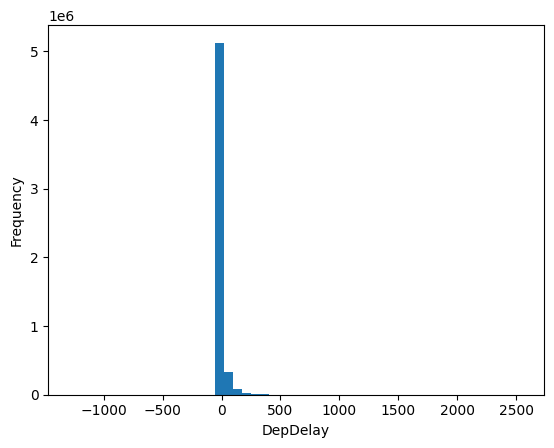

>>> plotting distribution for AirTime


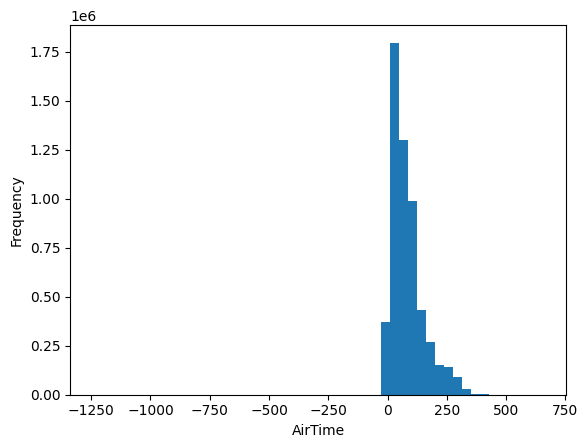

>>> plotting distribution for CRSElapsedTime


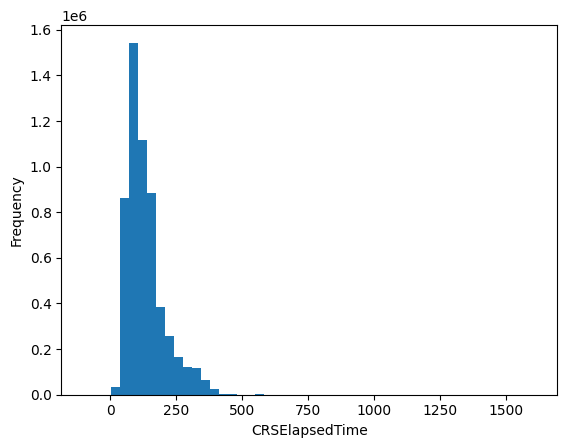

>>> plotting distribution for ActualElapsedTime


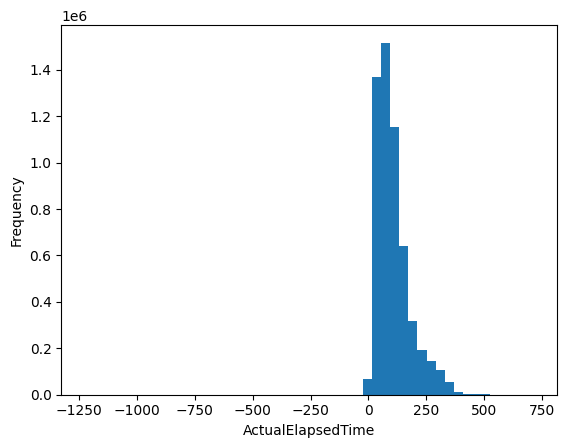

>>> plotting distribution for Distance


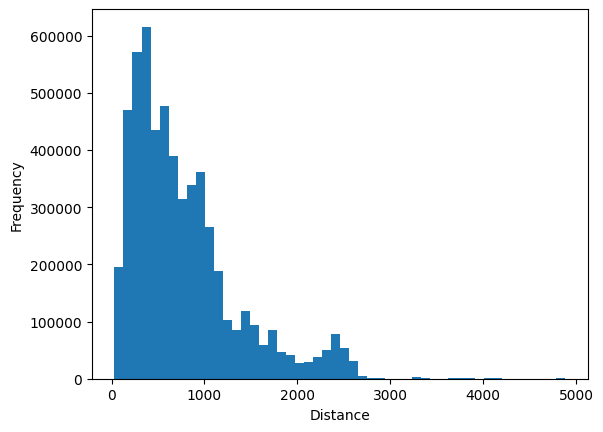

>>> plotting distribution for ArrDelay


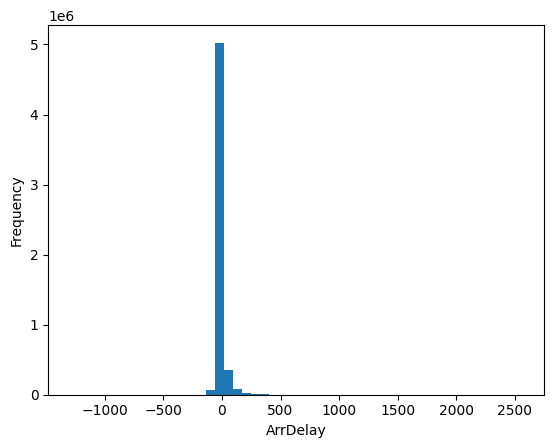

>>> plotting distribution for ArrDel15


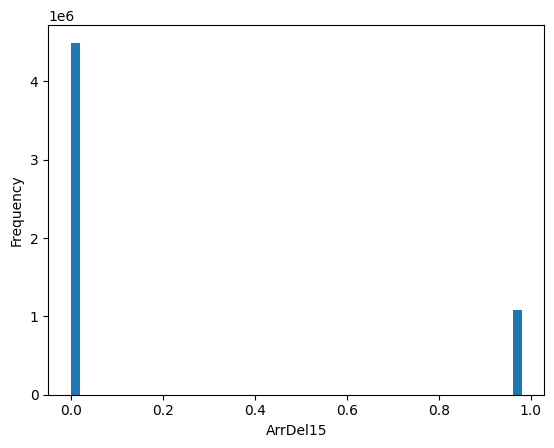

>>> plotting distribution for CRSDepTime_InMinutes


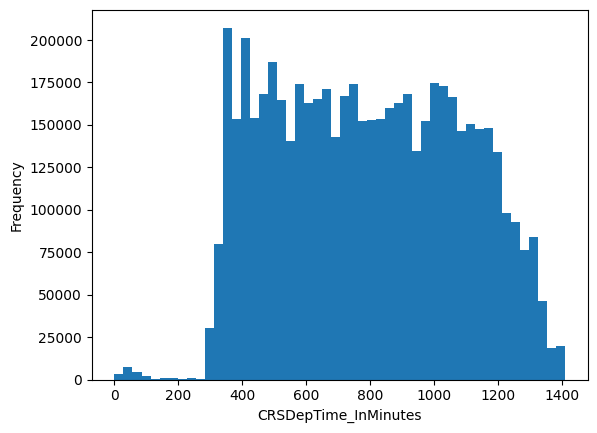

>>> plotting distribution for DepTime_InMinutes


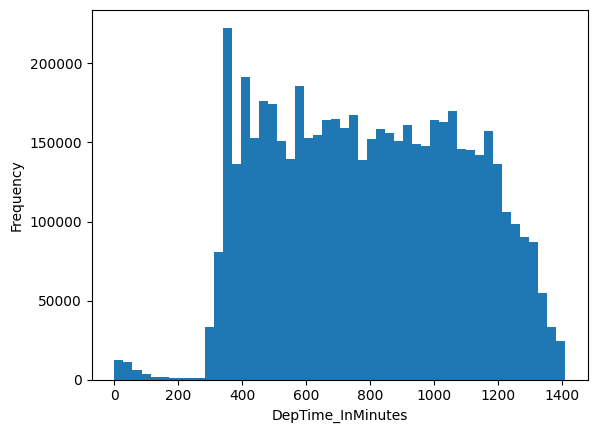

>>> plotting distribution for ArrTime_InMinutes


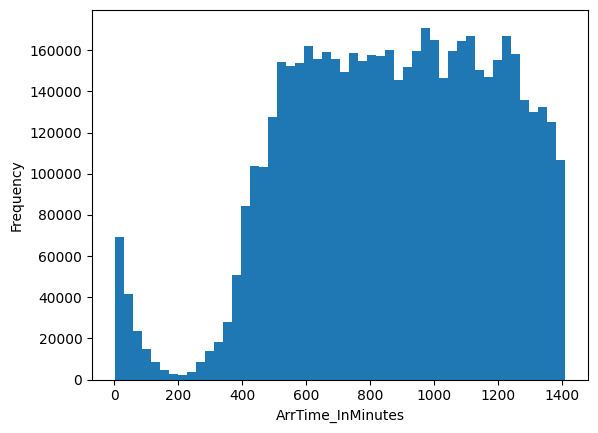

>>> plotting distribution for WheelsOff_InMinutes


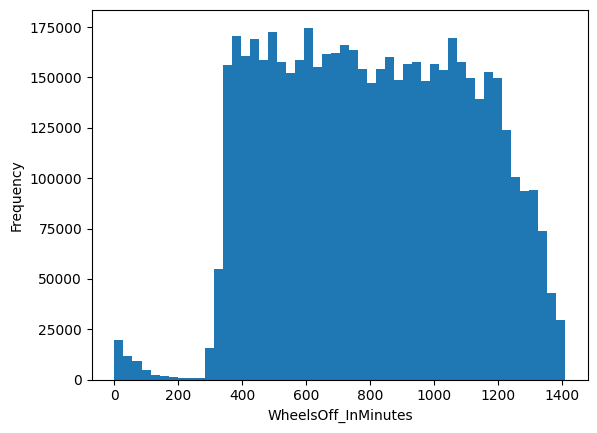

>>> plotting distribution for WheelsOn_InMinutes


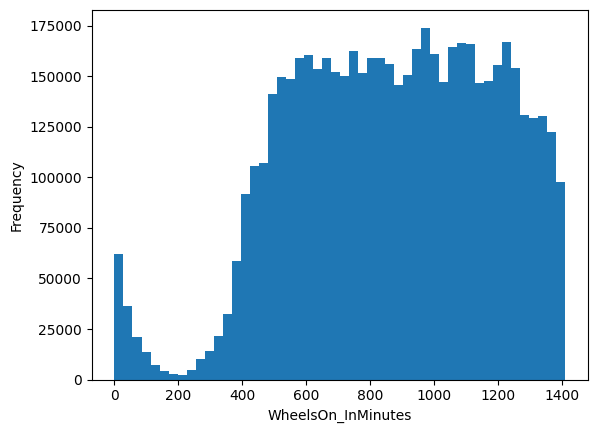

>>> plotting distribution for CRSArrTime_InMinutes


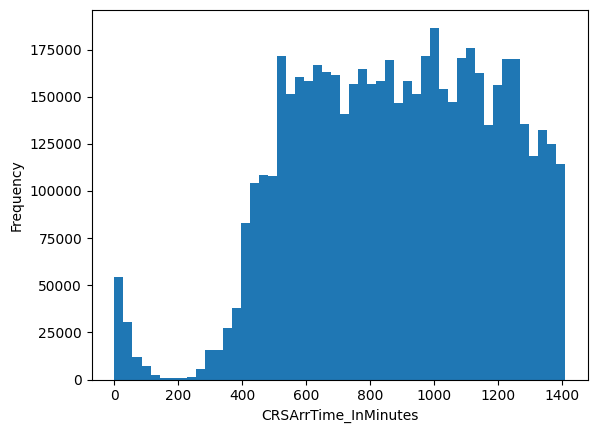

In [ ]:
%matplotlib inline

corr_df.createOrReplaceTempView("flight_corr")
query = sqlCtx.sql("Select Airtime from flight_corr")

xy_columns = ["DepDelay", "AirTime", "CRSElapsedTime", "ActualElapsedTime", "Distance", "ArrDelay", "ArrDel15", "CRSDepTime_InMinutes", "DepTime_InMinutes", "ArrTime_InMinutes", "WheelsOff_InMinutes", "WheelsOn_InMinutes", "CRSArrTime_InMinutes"]


for col in xy_columns:

    print(f">>> plotting distribution for {col}")

    query = sqlCtx.sql(f'Select Airtime, {col} from flight_corr')

    h = query.select(col).rdd.flatMap(lambda x: x).histogram(50)

    # Loading the Computed Histogram into a Pandas Dataframe for plotting
    dfh = pd.DataFrame(
        list(zip(*h)),
        columns=['bin', 'frequency']
    )

    bins = dfh['bin']
    counts = dfh['frequency']

    plt.hist(bins, len(bins), weights=counts)

    plt.xlabel(f'{col}', size=10)
    plt.ylabel("Frequency", size=10)
#     plt.title("Number of songs per mode", size=10)
    plt.show()

# Correlation

Since our Data Distribution seems to not be normal, we decided to Normalize our data.

In [ ]:
from pyspark.ml.linalg import DenseMatrix, Vectors
from pyspark.ml.stat import Correlation

In [ ]:
from pyspark.ml.feature import MinMaxScaler, VectorAssembler

In [ ]:
cleaned_df.printSchema()


root
 |-- FlightDate: timestamp_ntz (nullable = true)
 |-- Airline: string (nullable = true)
 |-- Origin: string (nullable = true)
 |-- Dest: string (nullable = true)
 |-- Cancelled: boolean (nullable = true)
 |-- Diverted: boolean (nullable = true)
 |-- Distance: double (nullable = true)
 |-- Month: long (nullable = true)
 |-- DayofMonth: long (nullable = true)
 |-- DayOfWeek: long (nullable = true)
 |-- Marketing_Airline_Network: string (nullable = true)
 |-- Operated_or_Branded_Code_Share_Partners: string (nullable = true)
 |-- Flight_Number_Marketing_Airline: long (nullable = true)
 |-- Operating_Airline: string (nullable = true)
 |-- Flight_Number_Operating_Airline: long (nullable = true)
 |-- OriginAirportID: long (nullable = true)
 |-- OriginCityName: string (nullable = true)
 |-- OriginStateName: string (nullable = true)
 |-- DestAirportID: long (nullable = true)
 |-- DestCityName: string (nullable = true)
 |-- DestStateName: string (nullable = true)
 |-- DepTimeBlk: string (nu

In [ ]:
# Specifica le colonne da normalizzare
colonne_da_normalizzare = ["AirTime", "CRSElapsedTime", "ActualElapsedTime", "Distance", "ArrDelay", "CRSDepTime_InMinutes", "DepTime_InMinutes", "ArrTime_InMinutes", "WheelsOff_InMinutes", "WheelsOn_InMinutes", "CRSArrTime_InMinutes"]
x_norm = cleaned_df.columns
colonne_da_normalizzare_def = []

for el in x_norm:
  if el in colonne_da_normalizzare:
    colonne_da_normalizzare_def.append(el)


# Creazione dell'Assembler per creare una feature vector
assembler = VectorAssembler(inputCols=colonne_da_normalizzare_def, outputCol="features")

# Creazione del normalizzatore MinMax
scaler = MinMaxScaler(inputCol="features", outputCol="scaled_features")

# Creazione della pipeline
pipeline = Pipeline(stages=[assembler, scaler])

# Addestra il modello sulla pipeline
model = pipeline.fit(cleaned_df)

# Applica la normalizzazione al DataFrame
df_normalizzato = model.transform(cleaned_df)

# Seleziona solo le colonne rilevanti
df_normalizzato_corr = df_normalizzato.select("scaled_features")

# Mostra il risultato
df_normalizzato.show(truncate=False)

+-------------------+-----------------+------+----+---------+--------+--------+-----+----------+---------+-------------------------+---------------------------------------+-------------------------------+-----------------+-------------------------------+---------------+--------------+---------------+-------------+------------+-------------+----------+----------+-------------+--------------------+--------------------+-------------------+-------------------------------------------------------------+
|FlightDate         |Airline          |Origin|Dest|Cancelled|Diverted|Distance|Month|DayofMonth|DayOfWeek|Marketing_Airline_Network|Operated_or_Branded_Code_Share_Partners|Flight_Number_Marketing_Airline|Operating_Airline|Flight_Number_Operating_Airline|OriginAirportID|OriginCityName|OriginStateName|DestAirportID|DestCityName|DestStateName|DepTimeBlk|ArrTimeBlk|DistanceGroup|CRSDepTime_InMinutes|CRSArrTime_InMinutes|features           |scaled_features                                          

In [ ]:
pearsonCorr = Correlation.corr(df_normalizzato_corr, 'scaled_features', 'pearson').collect()[0][0]


In [ ]:
 #pearsonCorr = Correlation.corr(output_dataset, 'assemblerfeatures', 'pearson').collect()[0][0]
features = corr_df.schema.names
#trasformo la DenseMatrix in un array numpy
correlation_array = pearsonCorr.toArray() #ritorna un numpy.ndarray

correlationDF = pd.DataFrame(
    correlation_array,
    index = features,
    columns = features
)

correlationDF

,Distance,CRSDepTime_InMinutes,CRSArrTime_InMinutes
Distance,1.000000,-0.011072,0.017922
CRSDepTime_InMinutes,-0.011072,1.000000,0.684909
CRSArrTime_InMinutes,0.017922,0.684909,1.000000


<Axes: >

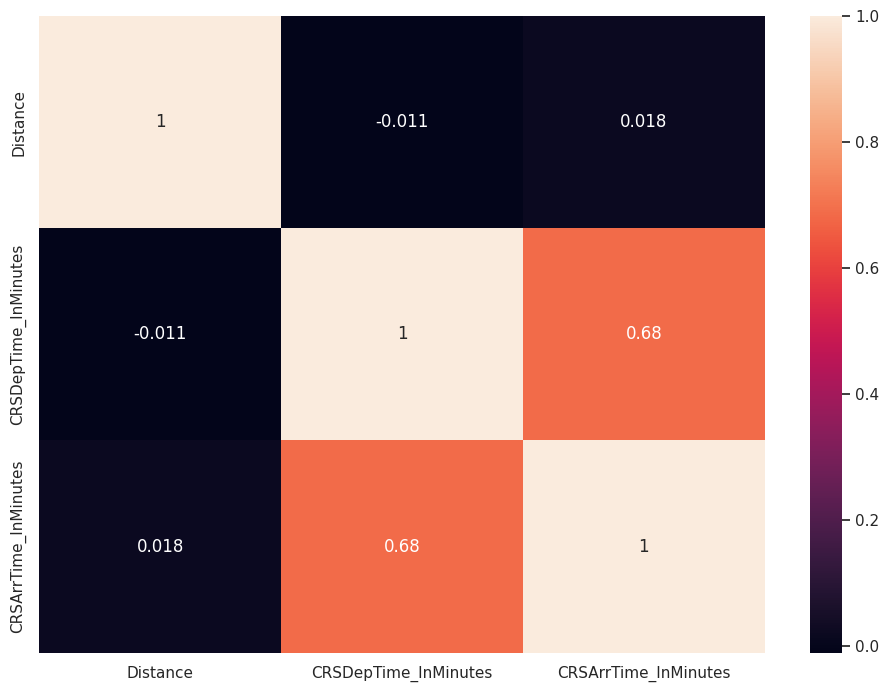

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(correlationDF, annot=True)

##Colonne normalizzate da droppare e motivazione:



-   CRSElapsedTime: è identico a AirTime
-   ActualElapsedTime: è identico ad Airtime
- CRSdepTime_inMinutes: è identico a DepTime_ InMinutes
- WheelsOff_in minutes: è identico Deptime_inMinutes
- WheelsOn_inMinutes: è identico a Arrtime_inMinutes
- CRSArrTime_InMinutes: è identico a Arrtime_inMinutes



#Colonne normalizzate da mantenere
- AirTime
- DepTime_inMinutes
- Arrtime_inMinutes
- Distance
- DepDelay
- ArrDelay



In [ ]:
from pyspark.sql.functions import col, udf
from pyspark.sql.types import DoubleType, ArrayType

# Definisci una funzione UDF per convertire VectorUDT in ArrayType
vector_to_array_udf = udf(lambda v: v.toArray().tolist(), ArrayType(DoubleType()))

# Applica la funzione UDF alla colonna "scaled_features"
df_norm_col = df_normalizzato.withColumn("scaled_features_array", vector_to_array_udf("scaled_features"))

# Estrai ogni singola colonna dalla colonna normalizzata
for i, col_name in enumerate(colonne_da_normalizzare_def):
    df_norm_col = df_norm_col.withColumn(f"scaled_{col_name}", col("scaled_features_array")[i])

# Rimuovi le colonne temporanee
df_norm_col = df_norm_col.drop("scaled_features", "scaled_features_array")

# Mostra il risultato
df_norm_col.show(truncate=False)

+-------------------+-----------------+------+----+---------+--------+--------+-----+----------+---------+-------------------------+---------------------------------------+-------------------------------+-----------------+-------------------------------+---------------+--------------+---------------+-------------+------------+-------------+----------+----------+-------------+--------------------+--------------------+-------------------+--------------------+---------------------------+---------------------------+
|FlightDate         |Airline          |Origin|Dest|Cancelled|Diverted|Distance|Month|DayofMonth|DayOfWeek|Marketing_Airline_Network|Operated_or_Branded_Code_Share_Partners|Flight_Number_Marketing_Airline|Operating_Airline|Flight_Number_Operating_Airline|OriginAirportID|OriginCityName|OriginStateName|DestAirportID|DestCityName|DestStateName|DepTimeBlk|ArrTimeBlk|DistanceGroup|CRSDepTime_InMinutes|CRSArrTime_InMinutes|features           |scaled_Distance     |scaled_CRSDepTime_InM

In [ ]:
df_norm_col = df_norm_col.withColumnRenamed("CRSDepTime_InMinutes", "CRSDepTime")
df_norm_col = df_norm_col.withColumnRenamed("DepTime_InMinutes", "DepTime")
df_norm_col = df_norm_col.withColumnRenamed("ArrTime_InMinutes", "ArrTime")
df_norm_col = df_norm_col.withColumnRenamed("WheelsOff_InMinutes", "WheelsOff")
df_norm_col = df_norm_col.withColumnRenamed("WheelsOn_InMinutes", "WheelsOn")
df_norm_col = df_norm_col.withColumnRenamed("CRSArrTime_InMinutes", "CRSArrTime")

In [ ]:
df_norm_col.show(10)

+-------------------+-----------------+------+----+---------+--------+--------+-----+----------+---------+-------------------------+---------------------------------------+-------------------------------+-----------------+-------------------------------+---------------+--------------+---------------+-------------+------------+-------------+----------+----------+-------------+----------+----------+-------------------+--------------------+---------------------------+---------------------------+
|         FlightDate|          Airline|Origin|Dest|Cancelled|Diverted|Distance|Month|DayofMonth|DayOfWeek|Marketing_Airline_Network|Operated_or_Branded_Code_Share_Partners|Flight_Number_Marketing_Airline|Operating_Airline|Flight_Number_Operating_Airline|OriginAirportID|OriginCityName|OriginStateName|DestAirportID|DestCityName|DestStateName|DepTimeBlk|ArrTimeBlk|DistanceGroup|CRSDepTime|CRSArrTime|           features|     scaled_Distance|scaled_CRSDepTime_InMinutes|scaled_CRSArrTime_InMinutes|
+---

In [ ]:
cleaned_df.show(20)

+-------------------+-----------------+------+----+---------+--------+--------+-------+--------------+-----------------+--------+-----+----------+---------+-------------------------+---------------------------------------+-------------------------------+-----------------+-----------+-------------------------------+---------------+--------------+---------------+-------------+------------+-------------+--------+--------------------+----------+--------+--------+------------------+----------+-------------+------------------+--------------------+-----------------+-----------------+-------------------+------------------+--------------------+-------+
|         FlightDate|          Airline|Origin|Dest|Cancelled|Diverted|DepDelay|AirTime|CRSElapsedTime|ActualElapsedTime|Distance|Month|DayofMonth|DayOfWeek|Marketing_Airline_Network|Operated_or_Branded_Code_Share_Partners|Flight_Number_Marketing_Airline|Operating_Airline|Tail_Number|Flight_Number_Operating_Airline|OriginAirportID|OriginCityName|O

## dropping features column


In [ ]:
result_df = df_norm_col.drop('features')

In [ ]:
#todrop = ["CRSElapsedTime", "ActualElapsedTime", "CRSDepTime", "CRSArrTime", 'scaled_CRSElapsedTime',"scaled_ActualElapsedTime", "scaled_CRSDepTime_InMinutes", "scaled_CRSArrTime_InMinutes"]

In [ ]:
# for col in todrop:
#   result_df = result_df.drop(col)

In [ ]:
result_df.show(20)

+-------------------+-----------------+------+----+---------+--------+--------+-----+----------+---------+-------------------------+---------------------------------------+-------------------------------+-----------------+-------------------------------+---------------+--------------+---------------+-------------+------------+-------------+----------+----------+-------------+----------+----------+--------------------+---------------------------+---------------------------+
|         FlightDate|          Airline|Origin|Dest|Cancelled|Diverted|Distance|Month|DayofMonth|DayOfWeek|Marketing_Airline_Network|Operated_or_Branded_Code_Share_Partners|Flight_Number_Marketing_Airline|Operating_Airline|Flight_Number_Operating_Airline|OriginAirportID|OriginCityName|OriginStateName|DestAirportID|DestCityName|DestStateName|DepTimeBlk|ArrTimeBlk|DistanceGroup|CRSDepTime|CRSArrTime|     scaled_Distance|scaled_CRSDepTime_InMinutes|scaled_CRSArrTime_InMinutes|
+-------------------+-----------------+-----

In [ ]:
df = result_df.repartition(100)

# Write to a Parquet file
df.write.format("parquet").mode("overwrite").option("compression", "snappy").save("output.parquet")

ERROR:root:KeyboardInterrupt while sending command.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/usr/local/lib/python3.10/dist-packages/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "/usr/lib/python3.10/socket.py", line 705, in readinto
    return self._sock.recv_into(b)
KeyboardInterrupt


KeyboardInterrupt: ignored

In [ ]:
!zip -r /content/file.zip /content/output.parquet

  adding: content/output.parquet/ (stored 0%)
  adding: content/output.parquet/.part-00087-2597fac9-8e6d-40e9-ac92-7015aece99de-c000.snappy.parquet.crc (stored 0%)
  adding: content/output.parquet/part-00087-2597fac9-8e6d-40e9-ac92-7015aece99de-c000.snappy.parquet (deflated 7%)
  adding: content/output.parquet/part-00002-2597fac9-8e6d-40e9-ac92-7015aece99de-c000.snappy.parquet (deflated 7%)
  adding: content/output.parquet/.part-00022-2597fac9-8e6d-40e9-ac92-7015aece99de-c000.snappy.parquet.crc (stored 0%)
  adding: content/output.parquet/part-00028-2597fac9-8e6d-40e9-ac92-7015aece99de-c000.snappy.parquet (deflated 7%)
  adding: content/output.parquet/part-00027-2597fac9-8e6d-40e9-ac92-7015aece99de-c000.snappy.parquet (deflated 6%)
  adding: content/output.parquet/.part-00049-2597fac9-8e6d-40e9-ac92-7015aece99de-c000.snappy.parquet.crc (stored 0%)
  adding: content/output.parquet/.part-00062-2597fac9-8e6d-40e9-ac92-7015aece99de-c000.snappy.parquet.crc (stored 0%)
  adding: content/outp

In [ ]:
from google.colab import files
files.download("/content/file.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>